# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import *
%matplotlib inline

from IPython import display
import time

from environments.evil_wgw_env import EvilWindyGridWorld
from tabular_methods import QTable

# Tabular methods (provably converge)

In [2]:
env = EvilWindyGridWorld(grid_size=(7, 10), visual=True, stochasticity=0.02)
num_actions = 4

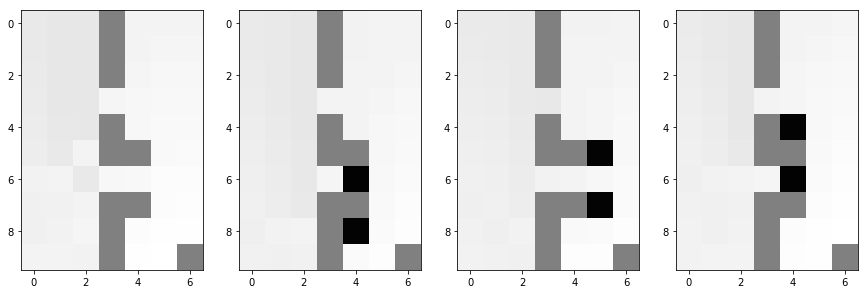

In [3]:
qt = QTable(env)
qt.run_policy_iteration(pol_eval_times=1, tol=1e-3)
qt.plot_q_values()

In [4]:
qt.update_policy()

(1, 9)

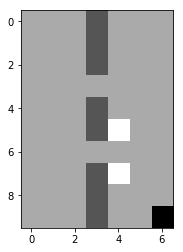

In [5]:
env.play_with_policy(qt.pi)

# Training visualization

# DQN versus distributional methods

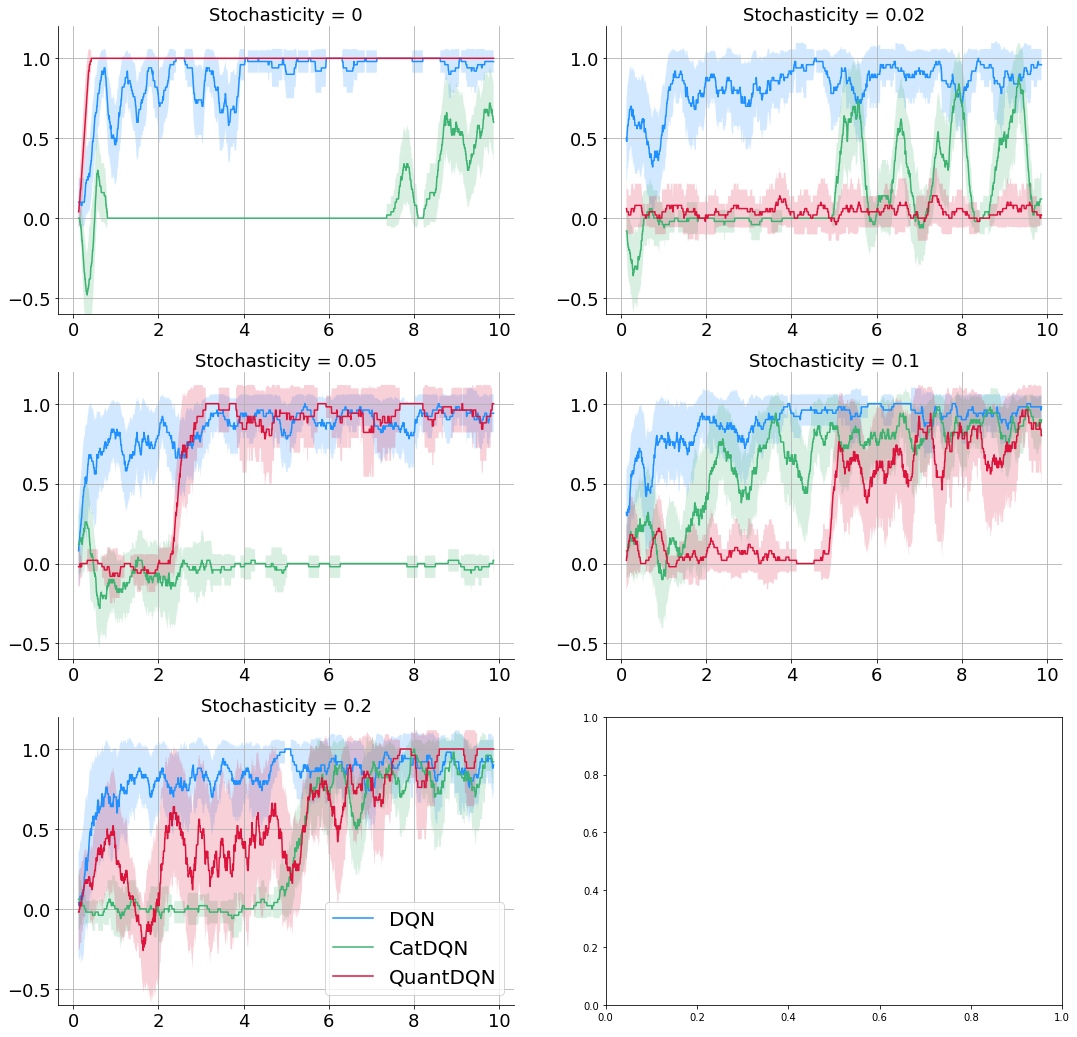

In [6]:
paths = [
    "evil_wgw_models/logs/exp0_1/model/learning_curve.npz",
    "evil_wgw_models/logs/exp02_1/model/learning_curve.npz",
    "evil_wgw_models/logs/exp05_1/model/learning_curve.npz",
    "evil_wgw_models/logs/exp1_1/model/learning_curve.npz",
    "evil_wgw_models/logs/exp2_1/model/learning_curve.npz"
]
titles = [
    "Stochasticity = 0",
    "Stochasticity = 0.02",
    "Stochasticity = 0.05",
    "Stochasticity = 0.1",
    "Stochasticity = 0.2"
]
colors = ["dodgerblue", "mediumseagreen", "crimson"]
labels = ["DQN", "CatDQN", "QuantDQN"]
tau = 50

plot_everything(paths, titles, colors, labels, tau)

# Categorical with various distribution supports

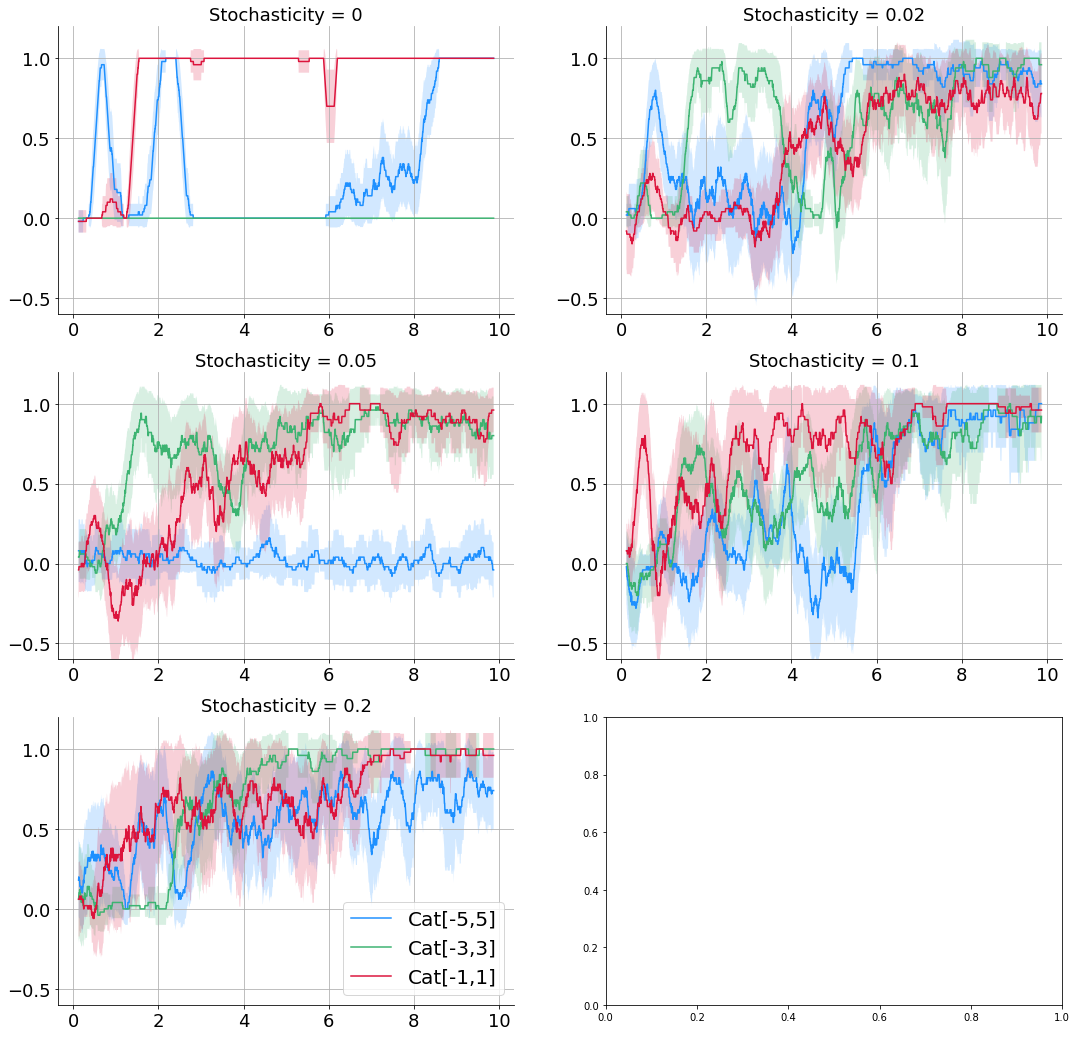

In [7]:
paths = [
    "results/categorical/exp0_1/model/learning_curve.npz",
    "results/categorical/exp02_1/model/learning_curve.npz",
    "results/categorical/exp05_1/model/learning_curve.npz",
    "results/categorical/exp1_1/model/learning_curve.npz",
    "results/categorical/exp2_1/model/learning_curve.npz"
]
titles = [
    "Stochasticity = 0",
    "Stochasticity = 0.02",
    "Stochasticity = 0.05",
    "Stochasticity = 0.1",
    "Stochasticity = 0.2"
]
colors = ["dodgerblue", "mediumseagreen", "crimson"]
labels = ["Cat[-5,5]", "Cat[-3,3]", "Cat[-1,1]"]
tau = 50

plot_everything(paths, titles, colors, labels, tau)

#### Average UNDISCOUNTED return

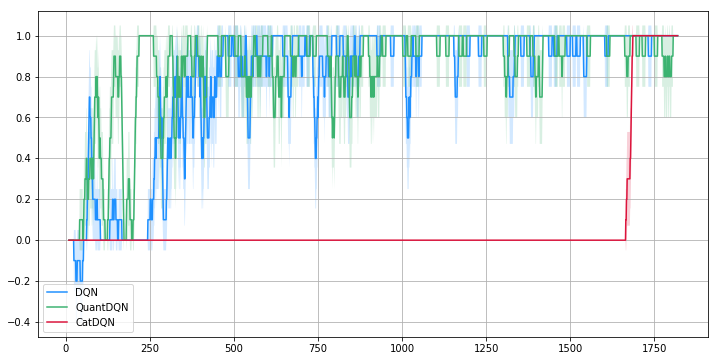

In [3]:
path = "evil_wgw_models/test/exp0_1/model/learning_curve.npz"
test = np.load(path)["test"]
quant, dqn, cat = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(dqn)),
    ys=[dqn, quant, cat],
    labels=["DQN", "QuantDQN", "CatDQN"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=10
)

#### Average number of steps in the episode

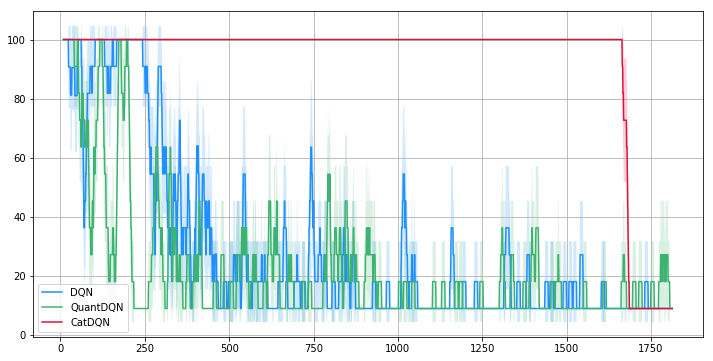

In [7]:
path = "evil_wgw_models/test/exp0_1/model/learning_curve.npz"
test = np.load(path)["test_num_steps"]
quant, dqn, cat = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(dqn)),
    ys=[dqn, quant, cat],
    labels=["DQN", "QuantDQN", "CatDQN"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=10
)

In [8]:
q = np.load(path)["q_vals"]
q_dqn, q_quant, q_cat = q[0, -1], q[1, -1], q[2, -1]

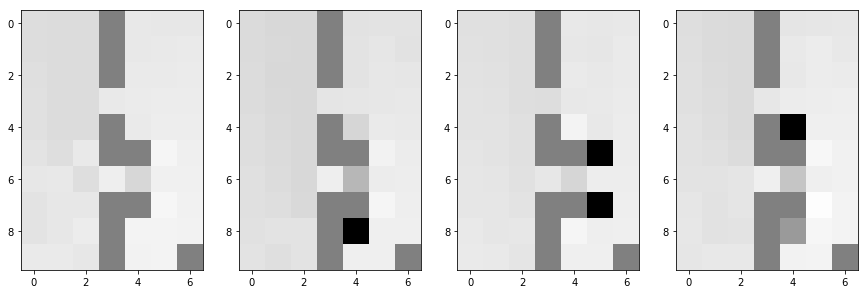

In [9]:
plot_q_values(env, q_dqn)

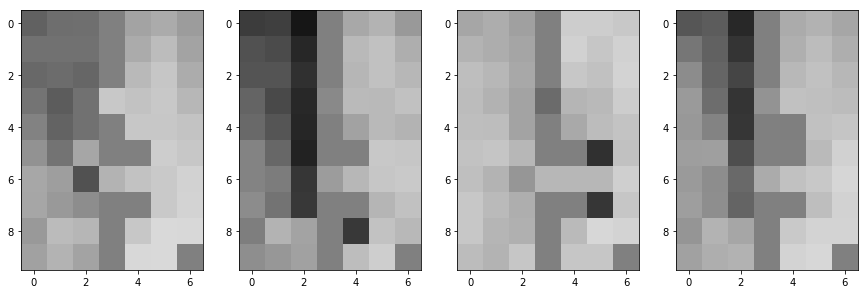

In [10]:
plot_q_values(env, q_quant)

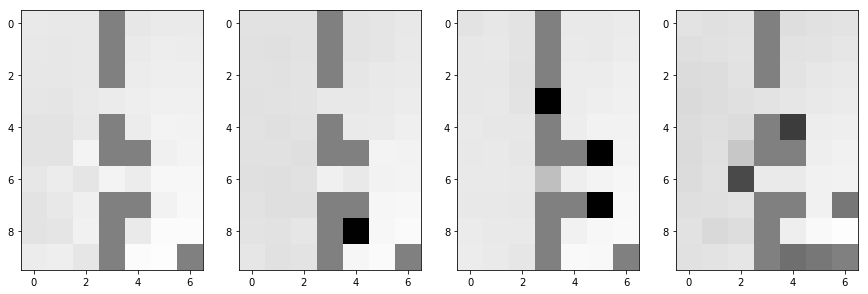

In [11]:
plot_q_values(env, q_cat)

# Categorical

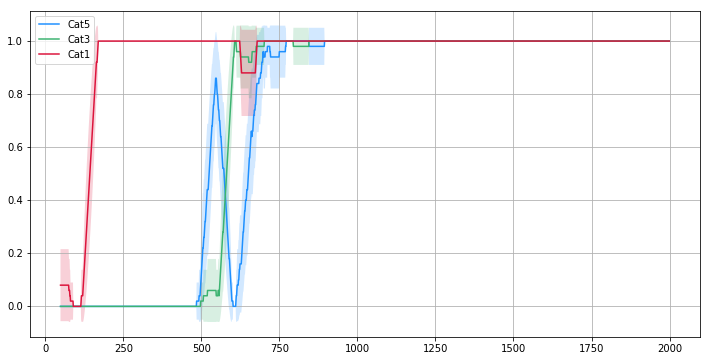

In [32]:
path = "results/categorical/exp0_2/model/learning_curve.npz"
test = np.load(path)["test"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

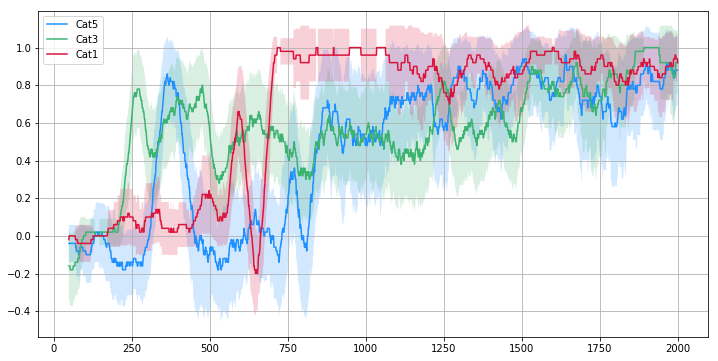

In [33]:
path = "results/categorical/exp02_2/model/learning_curve.npz"
test = np.load(path)["test"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

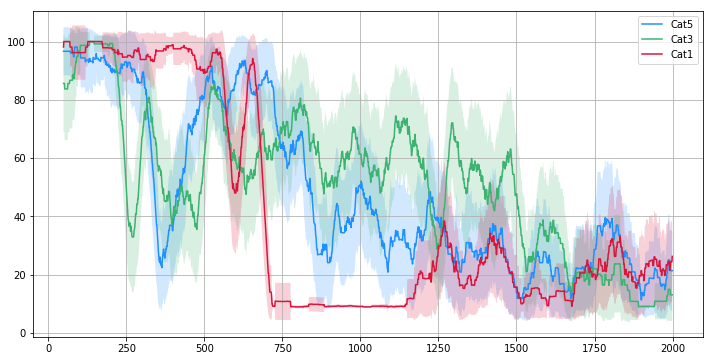

In [34]:
path = "results/categorical/exp02_2/model/learning_curve.npz"
test = np.load(path)["test_num_steps"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

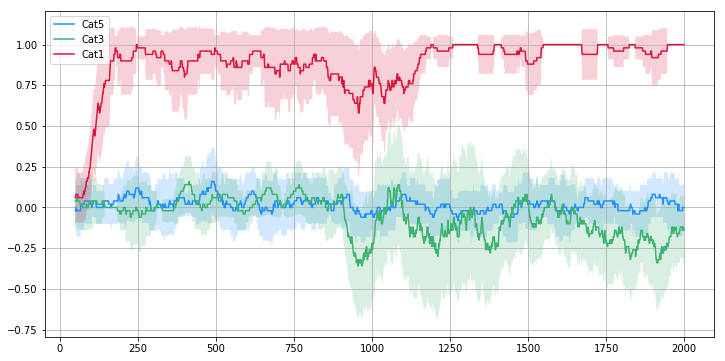

In [38]:
path = "results/categorical/exp05_2/model/learning_curve.npz"
test = np.load(path)["test"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

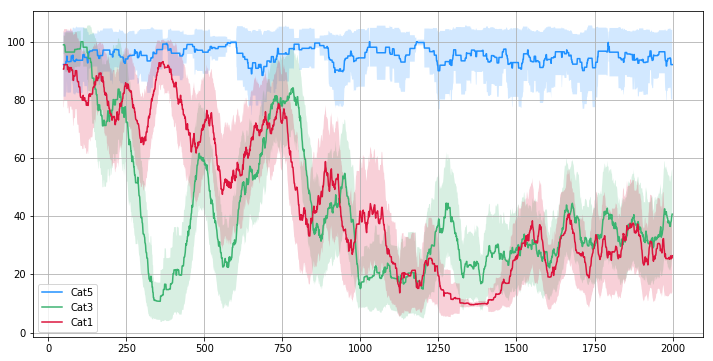

In [17]:
path = "results/categorical/exp05_1/model/learning_curve.npz"
test = np.load(path)["test_num_steps"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

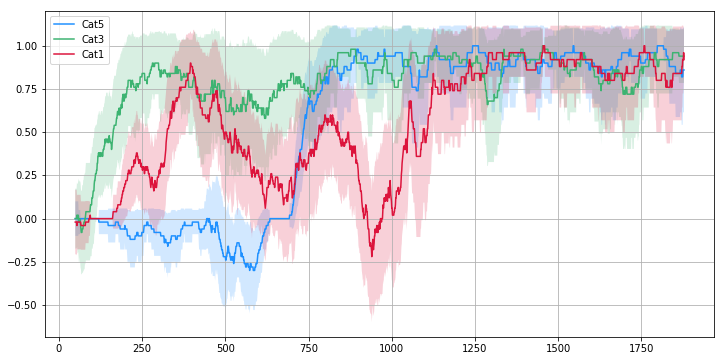

In [39]:
path = "results/categorical/exp1_2/model/learning_curve.npz"
test = np.load(path)["test"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

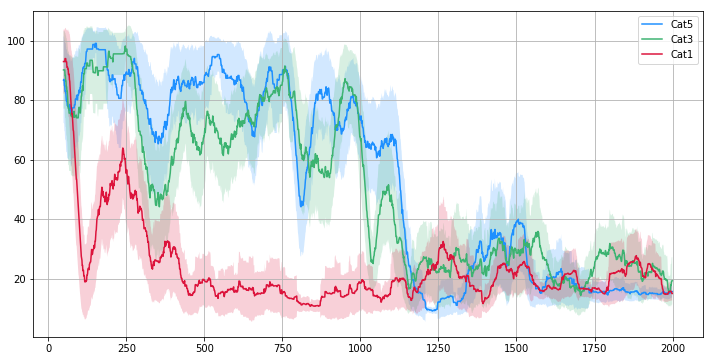

In [30]:
path = "results/categorical/exp1_1/model/learning_curve.npz"
test = np.load(path)["test_num_steps"]
cat05, cat03, cat01 = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(cat05)),
    ys=[cat05, cat03, cat01],
    labels=["Cat5", "Cat3", "Cat1"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=50
)

In [31]:
cat01[-20:]

array([13, 17, 14, 13, 16, 13, 36, 21, 27, 13, 13, 13, 15, 21, 13, 13, 14,
       21, 13, 13])

In [18]:
q = np.load(path)["q_vals"]
q5, q3, q1 = q[0, -1], q[1, -1], q[2, -1]

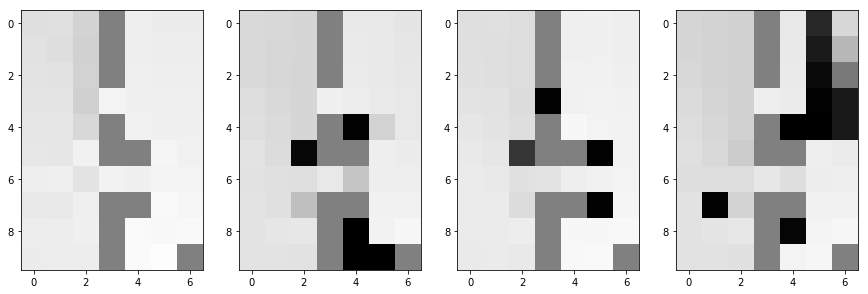

In [19]:
plot_q_values(env, q5)

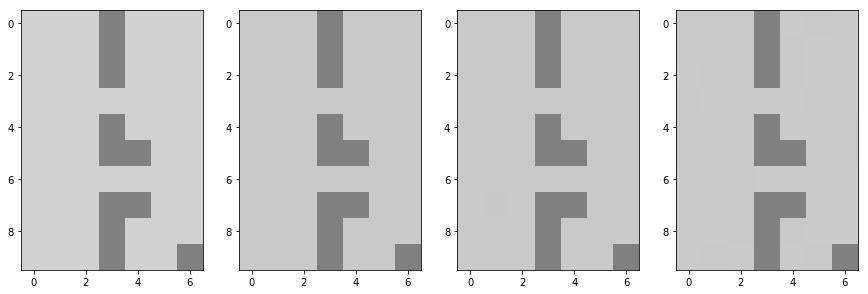

In [20]:
plot_q_values(env, q3)

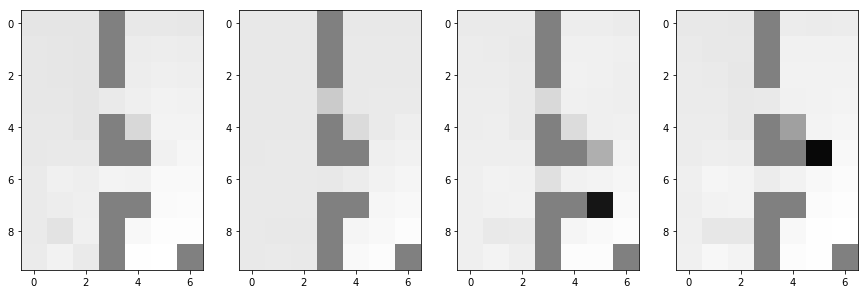

In [21]:
plot_q_values(env, q1)